In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)  #設定可顯示欄位的上限
pd.options.display.float_format = '{:,.6f}'.format  #設定浮點數的格式
import numpy as np


import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate, StratifiedKFold

## 讀取資料

In [2]:
data = pd.read_excel('GF_RFMmodelExample_20180507_W2.xlsx', encoding='utf8')
data.head()

,遊戲名稱,遊戲帳號,時間Key,RFM數字類型,RFM中文類型,價值指數,第一次儲值日期,最後一次儲值日期,平均儲值日期間隔,平均儲值日期區間,儲值次數,平均儲值金額,平均儲值金額區間,累積儲值金額,累積儲值金額區間,角色等級,最近上線時間,角色職業,修真,轉生級別,境界,魔書經驗,星運,魂力,傷害力指數,生存指數,聲望,修真_未填坑,境界_未填坑,星運_未填坑,轉生_未填坑,一轉等級
0,完美世界,31800459,2016-12-31,111,-_新戶,0.033000,2016-04-24,2016-04-24,251.000000,超過3個月,1,150,1K,150,1K,nan,NaT,NaN,NaN,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,完美世界,31800459,2017-12-31,111,N_退坑,0.033000,2016-04-24,2016-04-24,616.000000,超過3個月,1,150,1K,150,1K,nan,NaT,NaN,NaN,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,完美世界,31800459,2018-01-31,111,N_退坑,0.033000,2016-04-24,2016-04-24,647.000000,超過3個月,1,150,1K,150,1K,nan,NaT,NaN,NaN,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,完美世界,31800459,2018-02-19,111,N_退坑,0.033000,2016-04-24,2016-04-24,666.000000,超過3個月,1,150,1K,150,1K,nan,NaT,NaN,NaN,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,完美世界,31800459,2018-02-26,111,N_退坑,0.033000,2016-04-24,2016-04-24,673.000000,超過3個月,1,150,1K,150,1K,nan,NaT,NaN,NaN,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


## 檢查資料

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171030 entries, 0 to 171029
Data columns (total 32 columns):
遊戲名稱        171030 non-null object
遊戲帳號        171030 non-null object
時間Key       171030 non-null datetime64[ns]
RFM數字類型     171030 non-null int64
RFM中文類型     171030 non-null object
價值指數        171030 non-null float64
第一次儲值日期     171030 non-null datetime64[ns]
最後一次儲值日期    171030 non-null datetime64[ns]
平均儲值日期間隔    171030 non-null float64
平均儲值日期區間    171030 non-null object
儲值次數        171030 non-null int64
平均儲值金額      171030 non-null int64
平均儲值金額區間    171030 non-null object
累積儲值金額      171030 non-null int64
累積儲值金額區間    171030 non-null object
角色等級        92265 non-null float64
最近上線時間      88298 non-null datetime64[ns]
角色職業        97510 non-null object
修真          97510 non-null object
轉生級別        97482 non-null float64
境界          97482 non-null object
魔書經驗        97510 non-null float64
星運          97510 non-null float64
魂力          97510 non-null float64
傷害力指數       97510 non-n

In [4]:
#顯示有遺失值的欄位名稱
data.columns[data.isnull().any()]

Index(['角色等級', '最近上線時間', '角色職業', '修真', '轉生級別', '境界', '魔書經驗', '星運', '魂力',
       '傷害力指數', '生存指數', '聲望', '修真_未填坑', '境界_未填坑', '星運_未填坑', '轉生_未填坑', '一轉等級'],
      dtype='object')

In [5]:
data.describe()

,RFM數字類型,價值指數,平均儲值日期間隔,儲值次數,平均儲值金額,累積儲值金額,角色等級,轉生級別,魔書經驗,星運,魂力,傷害力指數,生存指數,聲望,修真_未填坑,境界_未填坑,星運_未填坑,轉生_未填坑,一轉等級
count,"171,030.000000","171,030.000000","171,030.000000","171,030.000000","171,030.000000","171,030.000000","92,265.000000","97,482.000000","97,510.000000","97,510.000000","97,510.000000","97,510.000000","97,510.000000","97,510.000000","97,482.000000","97,482.000000","97,482.000000","97,482.000000","97,482.000000"
mean,271.554517,0.467830,160.898417,71.462755,707.099813,"68,007.684997","1,756.791860",1.675745,"168,882,563.991970",2.349790,"19,459.601692","81,731.849092","220,221.017157","216,655.446129",10.393365,15.341242,5.649535,0.324255,87.823762
std,168.430057,0.765402,245.976406,155.945758,859.546544,"244,891.956862",732.895805,0.714073,"355,110,350.361300",1.594241,"8,450.452291","116,751.516641","330,171.287630","164,043.503165",12.509330,19.263134,1.593973,0.714073,36.264127
min,111.000000,0.033000,0.030000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,112.000000,0.066000,21.430000,3.000000,300.000000,"1,150.000000","2,101.000000",2.000000,0.000000,1.000000,"15,541.000000","19,474.000000","25,808.000000","125,307.000000",0.000000,0.000000,4.000000,0.000000,100.000000
50%,213.000000,0.165000,66.450000,17.000000,500.000000,"8,000.000000","2,103.000000",2.000000,"1,241,311.000000",3.000000,"17,051.500000","46,719.000000","102,116.000000","205,252.000000",9.000000,5.000000,5.000000,0.000000,102.000000
75%,422.000000,0.496000,201.387500,74.000000,844.000000,"44,000.000000","2,105.000000",2.000000,"128,003,933.000000",4.000000,"20,207.000000","93,459.000000","272,682.000000","284,880.500000",19.000000,30.000000,7.000000,0.000000,105.000000
max,555.000000,4.135000,"3,775.000000","6,000.000000","30,000.000000","14,728,950.000000","2,105.000000",2.000000,"1,800,000,000.000000",8.000000,"56,835.000000","1,465,619.000000","4,063,414.000000","1,348,603.000000",41.000000,50.000000,8.000000,2.000000,105.000000


## 填補遺失值

In [6]:
#角色職業用最多人選擇的職業來填補遺失值

data['角色職業'].value_counts()
data['角色職業'] = data['角色職業'].fillna(data['角色職業'].value_counts().index[0])

In [7]:
# 修真
data['修真'].value_counts()

41至聖      37911
22天仙      11971
00大乘以下    11085
32魔尊      10679
40混元       9565
21真仙       5148
31魔聖       4281
20上仙       3795
30狂魔       3047
xx           28
Name: 修真, dtype: int64

In [8]:
#修真_未填坑欄位為0時，修真該欄位應等於41至聖
data.loc[data['修真_未填坑'] == 0].fillna(data['修真'].value_counts().index[0])

,遊戲名稱,遊戲帳號,時間Key,RFM數字類型,RFM中文類型,價值指數,第一次儲值日期,最後一次儲值日期,平均儲值日期間隔,平均儲值日期區間,儲值次數,平均儲值金額,平均儲值金額區間,累積儲值金額,累積儲值金額區間,角色等級,最近上線時間,角色職業,修真,轉生級別,境界,魔書經驗,星運,魂力,傷害力指數,生存指數,聲望,修真_未填坑,境界_未填坑,星運_未填坑,轉生_未填坑,一轉等級
9,完美世界,a002418mg03,2011-12-31,114,-_新戶,0.132000,2011-11-12,2011-12-31,9.800000,2週,5,840,1K,4200,1K~5K,"2,105.000000",41至聖,羽靈,41至聖,2.000000,均天十重,"66,183.000000",5.000000,"23,445.000000","73,832.000000","741,418.000000","300,544.000000",0.000000,0.000000,3.000000,0.000000,105.000000
10,完美世界,a002418mg03,2012-12-31,115,P_喚回,0.165000,2011-11-12,2012-12-23,13.830000,2週,30,1428,1K~2K,42850,30K~50K,"2,105.000000",41至聖,羽靈,41至聖,2.000000,均天十重,"66,183.000000",5.000000,"23,445.000000","73,832.000000","741,418.000000","300,544.000000",0.000000,0.000000,3.000000,0.000000,105.000000
11,完美世界,a002418mg03,2013-12-31,215,N_停儲,0.331000,2011-11-12,2013-08-04,21.670000,1個月,36,1486,1K~2K,53510,50K~100K,"2,105.000000",41至聖,羽靈,41至聖,2.000000,均天十重,"66,183.000000",5.000000,"23,445.000000","73,832.000000","741,418.000000","300,544.000000",0.000000,0.000000,3.000000,0.000000,105.000000
12,完美世界,a002418mg03,2014-12-31,214,P_喚回,0.265000,2011-11-12,2014-12-28,15.070000,3週,76,1195,1K~2K,90809,50K~100K,"2,105.000000",41至聖,羽靈,41至聖,2.000000,均天十重,"66,183.000000",5.000000,"23,445.000000","73,832.000000","741,418.000000","300,544.000000",0.000000,0.000000,3.000000,0.000000,105.000000
13,完美世界,a002418mg03,2015-12-31,315,P_喚回,0.496000,2011-11-12,2015-12-12,16.410000,3週,92,1336,1K~2K,122909,100K~300K,"2,105.000000",41至聖,羽靈,41至聖,2.000000,均天十重,"66,183.000000",5.000000,"23,445.000000","73,832.000000","741,418.000000","300,544.000000",0.000000,0.000000,3.000000,0.000000,105.000000
14,完美世界,a002418mg03,2016-12-31,314,P_喚回,0.397000,2011-11-12,2016-12-01,15.630000,3週,120,1239,1K~2K,148709,100K~300K,"2,105.000000",41至聖,羽靈,41至聖,2.000000,均天十重,"66,183.000000",5.000000,"23,445.000000","73,832.000000","741,418.000000","300,544.000000",0.000000,0.000000,3.000000,0.000000,105.000000
15,完美世界,a002418mg03,2017-12-31,354,N_停儲,1.985000,2011-11-12,2017-08-22,17.370000,3週,129,1257,1K~2K,162119,100K~300K,"2,105.000000",2017-12-30 00:00:00,羽靈,41至聖,2.000000,均天十重,"66,183.000000",5.000000,"23,445.000000","73,832.000000","741,418.000000","300,544.000000",0.000000,0.000000,3.000000,0.000000,105.000000
16,完美世界,a002418mg03,2018-01-31,354,N_停儲,1.985000,2011-11-12,2017-08-22,17.610000,3週,129,1257,1K~2K,162119,100K~300K,"2,105.000000",2018-01-27 00:00:00,羽靈,41至聖,2.000000,均天十重,"66,183.000000",5.000000,"23,445.000000","73,832.000000","741,418.000000","300,544.000000",0.000000,0.000000,3.000000,0.000000,105.000000
17,完美世界,a002418mg03,2018-02-19,354,N_停儲,1.985000,2011-11-12,2017-08-22,17.760000,3週,129,1257,1K~2K,162119,100K~300K,41至聖,2018-02-19 00:00:00,羽靈,41至聖,2.000000,均天十重,"66,183.000000",5.000000,"23,445.000000","73,832.000000","741,418.000000","300,544.000000",0.000000,0.000000,3.000000,0.000000,105.000000
18,完美世界,a002418mg03,2018-02-26,354,N_停儲,1.985000,2011-11-12,2017-08-22,17.810000,3週,129,1257,1K~2K,162119,100K~300K,41至聖,2018-02-26 00:00:00,羽靈,41至聖,2.000000,均天十重,"66,183.000000",5.000000,"23,445.000000","73,832.000000","741,418.000000","300,544.000000",0.000000,0.000000,3.000000,0.000000,105.000000


## 去除遺失值

In [9]:
#只要任一觀測值有遺失值就捨棄
data = data.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44782 entries, 15 to 171029
Data columns (total 32 columns):
遊戲名稱        44782 non-null object
遊戲帳號        44782 non-null object
時間Key       44782 non-null datetime64[ns]
RFM數字類型     44782 non-null int64
RFM中文類型     44782 non-null object
價值指數        44782 non-null float64
第一次儲值日期     44782 non-null datetime64[ns]
最後一次儲值日期    44782 non-null datetime64[ns]
平均儲值日期間隔    44782 non-null float64
平均儲值日期區間    44782 non-null object
儲值次數        44782 non-null int64
平均儲值金額      44782 non-null int64
平均儲值金額區間    44782 non-null object
累積儲值金額      44782 non-null int64
累積儲值金額區間    44782 non-null object
角色等級        44782 non-null float64
最近上線時間      44782 non-null datetime64[ns]
角色職業        44782 non-null object
修真          44782 non-null object
轉生級別        44782 non-null float64
境界          44782 non-null object
魔書經驗        44782 non-null float64
星運          44782 non-null float64
魂力          44782 non-null float64
傷害力指數       44782 non-null float64
生存指

## 建立樣本標籤

In [10]:
# 標記出退坑、停滯、停儲等流失客戶
data['isvalue'] = 1

data.loc[data['RFM中文類型']=='N_停儲' ,'isvalue']=0
data.loc[data['RFM中文類型']=='N_停滯' ,'isvalue']=0
data.loc[data['RFM中文類型']=='N_退坑' ,'isvalue']=0

data['isvalue'].value_counts()

0    28743
1    16039
Name: isvalue, dtype: int64

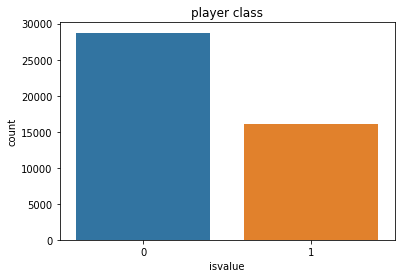

In [11]:
g = sns.countplot('isvalue', data=data)
g = g.set_title('player class')

## 建立訓練數據

In [12]:
df = data[['平均儲值日期間隔','儲值次數', '平均儲值金額','角色等級','累積儲值金額',
           '傷害力指數', '生存指數', '聲望', '角色職業','isvalue']]
df = pd.get_dummies(df, columns=['角色職業'])

In [13]:
y = df['isvalue']

In [14]:
df = df.drop(['isvalue'], axis=1)

In [15]:
df.sample()

,平均儲值日期間隔,儲值次數,平均儲值金額,角色等級,累積儲值金額,傷害力指數,生存指數,聲望,角色職業_刺客,角色職業_劍靈,角色職業_夜影,角色職業_妖獸,角色職業_妖精,角色職業_巫師,角色職業_月仙,角色職業_武俠,角色職業_法師,角色職業_羽芒,角色職業_羽靈,角色職業_魅靈
14240,209.330000,12,338,"1,101.000000",4050,"28,716.000000","33,905.000000","106,607.000000",0,0,0,0,0,0,1,0,0,0,0,0


## 切分訓練、驗證樣本

In [16]:
# random_state的值必須固定，每次切分數據時訓練、驗證樣本才會一模一樣。
# test_size為驗證樣本佔樣本多少比例

train_x, val_x, train_y, val_y = train_test_split(df, y, 
                                                  random_state = 0,
                                                  test_size=0.1)

## 建立模型

### 隨機森林

In [17]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [18]:
#訓練樣本各特徵的重要性
print(clf.feature_importances_)

[0.30749235 0.09999245 0.09028283 0.04859032 0.11132173 0.09936093
 0.10312888 0.07825528 0.00523042 0.00625783 0.00388208 0.00444076
 0.00624997 0.00368082 0.00472224 0.00546596 0.00441842 0.00561946
 0.00723258 0.00437467]


In [19]:
#在驗證樣本上的準確率
print(clf.score(val_x, val_y))

0.9341370841705738


In [20]:
#預測標籤
clf.predict(train_x)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [21]:
#預測機率
clf.predict_proba(train_x)

array([[0.  , 1.  ],
       [0.95, 0.05],
       [0.92, 0.08],
       ...,
       [1.  , 0.  ],
       [0.09, 0.91],
       [1.  , 0.  ]])

### 隨機森林與決策樹的比較

In [22]:
dtc = DecisionTreeClassifier()
# n_estimators通常會設定在100以上
rfc = RandomForestClassifier(n_estimators=100)

In [23]:
#設定kfold的k為多少
kfold = StratifiedKFold(n_splits=10)

In [24]:
#10折的交叉驗證來評估分類器的性能
classifiers = []
classifiers.append(dtc)
classifiers.append(rfc)


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, train_x, train_y, scoring = "accuracy", cv = kfold, n_jobs=-1))
    

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                       "Algorithm":['DecisionTree', 'RandomForest']})
cv_res

,Algorithm,CrossValMeans,CrossValerrors
0,DecisionTree,0.913207,0.004123
1,RandomForest,0.929335,0.002326


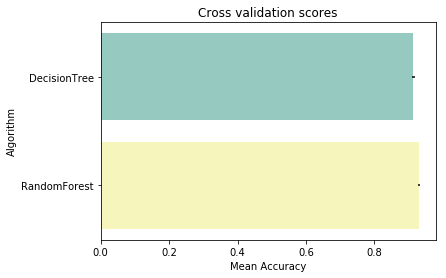

In [25]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

## 主成分分析

### 特徵經過標準化

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [27]:
#標準化
scaler = StandardScaler()
X=scaler.fit_transform(train_x)
X

array([[-0.68157976,  0.57984614,  0.36834908, ..., -0.299913  ,
        -0.43476356,  4.77111741],
       [-0.3480689 , -0.46996229,  0.858112  , ..., -0.299913  ,
        -0.43476356, -0.20959451],
       [ 0.20975791, -0.38426364, -0.6758812 , ...,  3.33430032,
        -0.43476356, -0.20959451],
       ...,
       [ 0.63617979, -0.46996229, -0.25380909, ..., -0.299913  ,
        -0.43476356, -0.20959451],
       [-0.71038578,  2.20276428,  0.52961248, ..., -0.299913  ,
         2.30010077, -0.20959451],
       [ 1.64387525, -0.44318146, -0.07363209, ..., -0.299913  ,
        -0.43476356, -0.20959451]])

In [28]:
pca = PCA()
pca.fit_transform(X)

array([[ 2.00157914e+00,  9.76474326e-03,  6.31105773e-01, ...,
        -1.87118191e-01, -2.21527880e-01, -1.39428351e-15],
       [-2.12449992e+00,  2.53470124e+00,  1.98950277e-02, ...,
        -2.03048351e-02, -3.40981945e-01, -4.44353747e-15],
       [-9.31938146e-01, -1.69244895e-01,  3.62102425e-01, ...,
         7.16227353e-01,  2.47106783e-01,  1.16944394e-15],
       ...,
       [-4.10910532e-02, -1.03702670e+00,  2.48219632e-01, ...,
        -1.88561563e-01, -2.48785007e-03,  9.33385018e-17],
       [ 3.56818047e+00,  6.43542779e-01, -1.78878332e+00, ...,
        -2.76310721e-01, -7.02758138e-02,  4.73955683e-17],
       [-1.55406601e+00,  1.15871595e-01, -7.80058946e-01, ...,
        -5.21577549e-01, -1.66058415e-01,  1.47961244e-16]])

In [29]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([1.85828552e-01, 7.72222300e-02, 6.21625872e-02, 5.96748707e-02,
       5.59048003e-02, 5.57700334e-02, 5.42817719e-02, 5.40569374e-02,
       5.30644688e-02, 5.29897209e-02, 5.26119616e-02, 5.20066334e-02,
       4.16947797e-02, 3.86772791e-02, 3.79343136e-02, 2.35405984e-02,
       1.82671050e-02, 1.39619675e-02, 1.03493898e-02, 3.52635958e-32])

In [30]:
def select_n_components(var_ratio, goal_var: float) -> int:
    
    total_variance = 0.0
    
    n_components = 0
    
    for explained_variance in var_ratio:
        
        total_variance += explained_variance
        
        n_components += 1
        
        if total_variance >= goal_var:
            # 停止迴圈
            break
            
    #回傳該選擇多少個 n_components
    return n_components

In [31]:
select_n_components(explained_variance, 0.95)

16

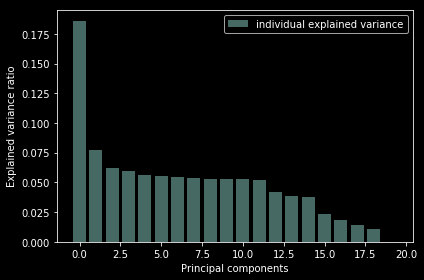

In [32]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(train_x.columns)), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [33]:
#將訓練樣本的特徵縮減為pca所決定之特徵
pca=PCA(n_components=16)
X_new = pca.fit_transform(X)
X_new

array([[ 2.00157914,  0.00976474,  0.63110577, ..., -0.34103598,
        -0.51041794, -0.64592063],
       [-2.12449992,  2.53470124,  0.01989503, ...,  1.29251578,
        -0.77441771,  0.55539901],
       [-0.93193815, -0.16924489,  0.36210243, ...,  0.47781729,
         0.68163149, -0.14855974],
       ...,
       [-0.04109105, -1.0370267 ,  0.24821963, ..., -0.42377701,
         0.28857917, -0.29551703],
       [ 3.56818047,  0.64354278, -1.78878332, ..., -0.60126274,
         0.29121172, -0.05303293],
       [-1.55406601,  0.1158716 , -0.78005895, ...,  0.29580564,
         1.03413282, -0.3999459 ]])

### 特徵未經過標準化

In [34]:
pca = PCA()
pca.fit_transform(train_x)

array([[ 3.73362049e+05, -1.14269551e+05,  6.10024817e+03, ...,
         1.54495672e-02,  9.38532065e-01, -1.67766967e-15],
       [-2.56732204e+05,  9.04122502e+04,  1.29821646e+05, ...,
        -3.65836477e-04, -2.27766725e-03,  1.82628835e-15],
       [-2.51239154e+05,  8.38492922e+04,  1.26941290e+05, ...,
         2.16426400e-02, -6.23642867e-02, -1.15254910e-15],
       ...,
       [ 8.53685002e+03, -1.30758721e+05,  3.15329455e+04, ...,
         4.14393230e-03, -3.91627208e-03,  4.21182673e-18],
       [ 7.06758558e+05,  1.65339371e+05, -9.36873578e+04, ...,
        -1.24272804e-02,  2.39927377e-02, -3.62247724e-17],
       [-2.26099952e+05,  6.83960376e+04,  1.34155555e+05, ...,
         1.28058550e-02, -3.18461547e-03,  4.67833548e-17]])

In [35]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([6.88253268e-01, 1.97974566e-01, 8.57287997e-02, 2.80377018e-02,
       3.54176041e-06, 1.89646040e-06, 1.59893013e-07, 6.63171667e-08,
       6.75313993e-13, 4.92035990e-13, 4.63345711e-13, 3.85021014e-13,
       3.72824025e-13, 3.26290099e-13, 2.93649028e-13, 2.38642246e-13,
       2.20712622e-13, 2.16203160e-13, 1.97980762e-13, 2.25079579e-43])

In [36]:
select_n_components(explained_variance, 0.95)

3

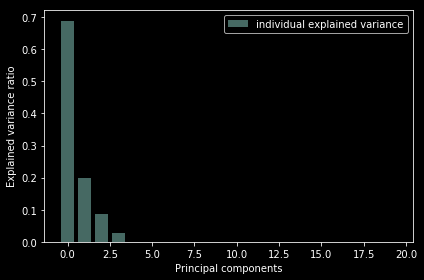

In [37]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(train_x.columns)), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [38]:
pca=PCA(n_components=3)
X_new = pca.fit_transform(X)
X_new

array([[ 2.00647839, -0.01861745,  0.27465786],
       [-2.12586243,  2.54158837, -0.04075065],
       [-0.93385729, -0.16208658,  0.53148466],
       ...,
       [-0.03837044, -1.05521658,  0.153699  ],
       [ 3.56911828,  0.64069879, -1.77326477],
       [-1.54928924,  0.08951787, -0.87903634]])

In [39]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.18582819, 0.07721319, 0.06198412])

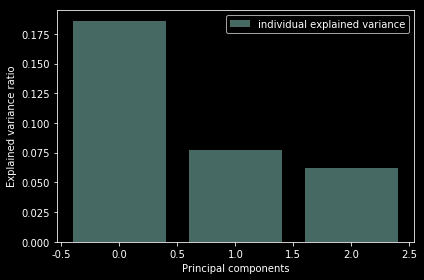

In [40]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(3), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

### RFECV

In [41]:
# 列出訓練樣本的所有特徵
all_features = [x for x in train_x.columns]

In [42]:
# RFECV使用分類器為決策樹，效能衡量標準為準確率
rfecv = RFECV(estimator=dtc, step=1,
              scoring='accuracy')

rfecv.fit(train_x, train_y)

print("Optimal number of features : %d" % rfecv.n_features_)

#列出被選中的特徵
sel_features = [f for f, s in zip(all_features, rfecv.support_) if s]
print('The selected features are {}'.format(sel_features))

Optimal number of features : 19
The selected features are ['平均儲值日期間隔', '儲值次數', '平均儲值金額', '角色等級', '累積儲值金額', '傷害力指數', '生存指數', '聲望', '角色職業_刺客', '角色職業_劍靈', '角色職業_夜影', '角色職業_妖獸', '角色職業_妖精', '角色職業_巫師', '角色職業_月仙', '角色職業_武俠', '角色職業_羽芒', '角色職業_羽靈', '角色職業_魅靈']


In [43]:
# RFECV使用分類器為隨機森林，效能衡量標準為準確率
rfecv = RFECV(estimator=rfc, step=1,
              scoring='accuracy')

rfecv.fit(train_x, train_y)

print("Optimal number of features : %d" % rfecv.n_features_)

#列出被選中的特徵
sel_features = [f for f, s in zip(all_features, rfecv.support_) if s]
print('The selected features are {}'.format(sel_features))

Optimal number of features : 7
The selected features are ['平均儲值日期間隔', '儲值次數', '平均儲值金額', '累積儲值金額', '傷害力指數', '生存指數', '聲望']
